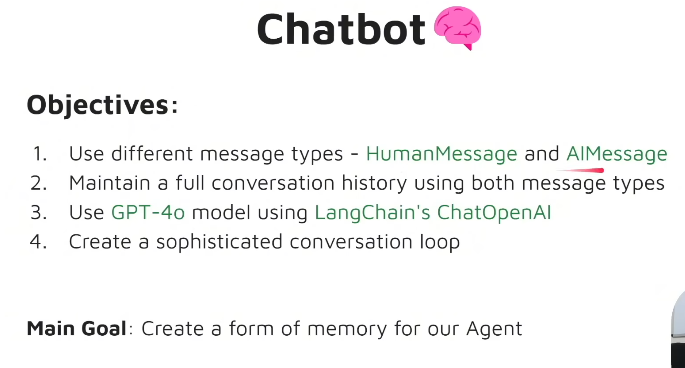

In [1]:
from typing import TypedDict, List, Union
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

load_dotenv()

True

Instead of just including HumanMessage's this time, we want to include AIMessage's too so that AI has full context of the conversation history.

And for that we use Union Types - which means something can be multiple types.

In [2]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage]]

llm = ChatOpenAI(model="gpt-4o")

In [ ]:
def process(state: AgentState) -> AgentState:
    """ This node will solve the request you input """
    response = llm.invoke(state["messages"])

    state["messages"].append(AIMessage(content=response.content)) # appends it to the messages with user's message that was passed to this function
    print(f"\nAI: {response.content}")

    return state

In [4]:
graph = StateGraph(AgentState)
graph.add_node("process", process)

graph.add_edge(START, "process")
graph.add_edge("process", END)
agent = graph.compile()

In [7]:
conversation_history = []

user_input = input("Enter: ")
while user_input != "exit":
    conversation_history.append(HumanMessage(content=user_input))
    new_state = agent.invoke({"messages": conversation_history})
    conversation_history = new_state["messages"]
    user_input = input("Enter: ")

# It remembers the entire conversation history, 
# including HumanMessage's an AIMessage's.

#ISSUE: When you exit the program and cme back, 
# the state is reset, and it does not remember it anymore.

# You can store the state in the database 
# but for now we will just store it in text file.

with open("logging.txt", "w") as file:
    file.write("Your Conversation Log.\n")

    for message in conversation_history:
        if isinstance(message, HumanMessage):
            file.write(f"You: {message.content}\n")
        elif isinstance(message, AIMessage):
            file.write(f"AI: {message.content}\n\n")

    file.write("End of Conversation")

print("Conversation Saved to logging.txt")
    


AI: I'm sorry, but I can't remember past interactions or conversations. How can I assist you today?
Conversation Saved to logging.txt
